In [23]:
import numpy as np

np.random.seed(1337)  # for reproducibility
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics._regression import mean_squared_error ,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from dbn import SupervisedDBNRegression
import matplotlib.pyplot as plt 
import os
import sys 
import time

In [24]:
df = pd.read_csv('../../data/Equity/NSE50.csv')

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

In [26]:
df = df.loc['2011-1':]

In [27]:
data = df['Close'].copy()

In [28]:
data.tail(10)

Date
2021-03-05    14963.1504
2021-03-08    14962.8496
2021-03-09    15098.7002
2021-03-10    15168.1504
2021-03-12    15023.9502
2021-03-15    14920.9004
2021-03-16    14922.0000
2021-03-17    14709.2500
2021-03-18    14583.7002
2021-03-19    14735.7002
Name: Close, dtype: float64

In [29]:
# Training and testing data
train_size = int(len(data)*0.80)
train = data[:train_size]
test = data[train_size :]

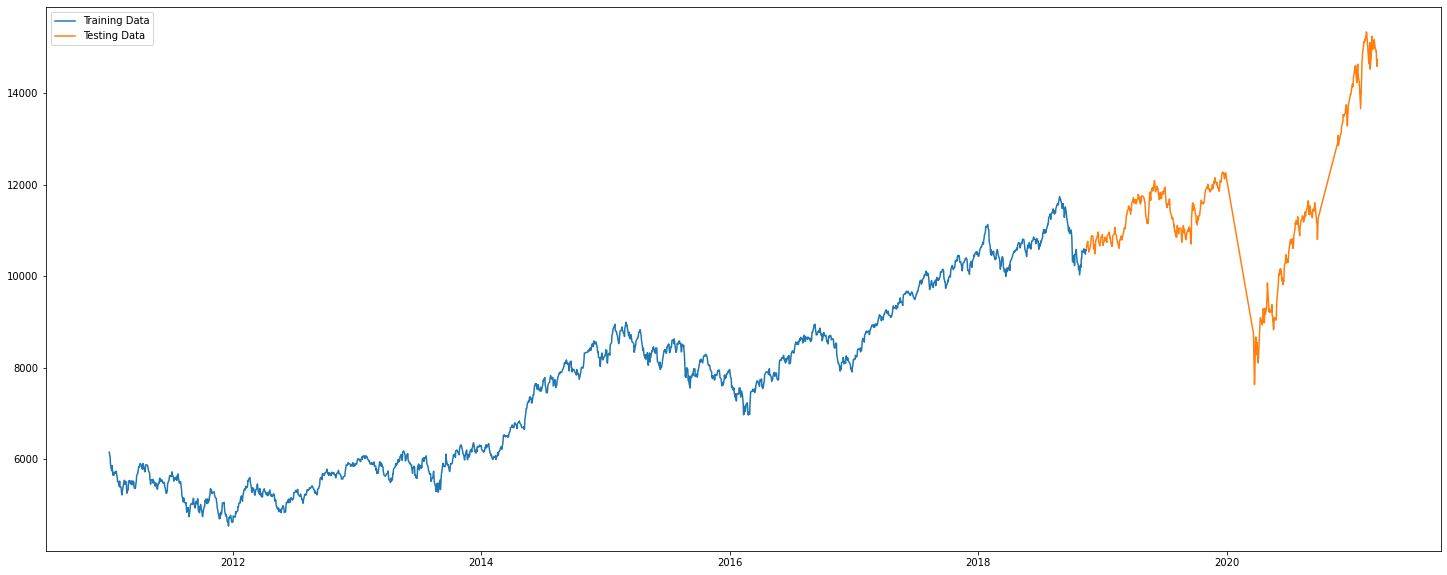

In [30]:
plt.figure(figsize=(25,10))
plt.plot(train , label='Training Data')
plt.plot(test , label='Testing Data')
plt.legend()
plt.show()

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(np.array(train).reshape(-1,1))

In [32]:
backcheck = 60
X_train , y_train = [] , []
for i in range(backcheck , len(scaled_train)):
    X_train.append(scaled_train[i-backcheck : i ,0])
    y_train.append(scaled_train[i,0])

In [33]:
scaled_test = scaler.transform(np.array(test).reshape(-1,1))

In [34]:
backcheck = 60
X_test , y_test = [] , []
for i in range(backcheck , len(scaled_test)):
    X_test.append(scaled_test[i-backcheck : i,0])
    y_test.append(scaled_test[i ,0])
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [35]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [36]:
regressor = SupervisedDBNRegression(hidden_layers_structure=[100],
                                    learning_rate_rbm=0.0001,
                                    learning_rate=0.0001,
                                    n_epochs_rbm=100,
                                    n_iter_backprop=150,
                                    batch_size=32,
                                    activation_function='relu')


In [14]:
regressor.fit(X_train , y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 12.916194
>> Epoch 2 finished 	RBM Reconstruction error 12.705711
>> Epoch 3 finished 	RBM Reconstruction error 12.477890
>> Epoch 4 finished 	RBM Reconstruction error 12.230222
>> Epoch 5 finished 	RBM Reconstruction error 11.959364
>> Epoch 6 finished 	RBM Reconstruction error 11.661780
>> Epoch 7 finished 	RBM Reconstruction error 11.332860
>> Epoch 8 finished 	RBM Reconstruction error 10.968816
>> Epoch 9 finished 	RBM Reconstruction error 10.564387
>> Epoch 10 finished 	RBM Reconstruction error 10.115144
>> Epoch 11 finished 	RBM Reconstruction error 9.616935
>> Epoch 12 finished 	RBM Reconstruction error 9.066775
>> Epoch 13 finished 	RBM Reconstruction error 8.461802
>> Epoch 14 finished 	RBM Reconstruction error 7.802698
>> Epoch 15 finished 	RBM Reconstruction error 7.091746
>> Epoch 16 finished 	RBM Reconstruction error 6.337052
>> Epoch 17 finished 	RBM Reconstruction error 5.552127
>> Epoch 18 finished

>> Epoch 53 finished 	ANN training loss 0.001947
>> Epoch 54 finished 	ANN training loss 0.001945
>> Epoch 55 finished 	ANN training loss 0.001943
>> Epoch 56 finished 	ANN training loss 0.001941
>> Epoch 57 finished 	ANN training loss 0.001940
>> Epoch 58 finished 	ANN training loss 0.001938
>> Epoch 59 finished 	ANN training loss 0.001936
>> Epoch 60 finished 	ANN training loss 0.001935
>> Epoch 61 finished 	ANN training loss 0.001933
>> Epoch 62 finished 	ANN training loss 0.001932
>> Epoch 63 finished 	ANN training loss 0.001930
>> Epoch 64 finished 	ANN training loss 0.001928
>> Epoch 65 finished 	ANN training loss 0.001927
>> Epoch 66 finished 	ANN training loss 0.001925
>> Epoch 67 finished 	ANN training loss 0.001924
>> Epoch 68 finished 	ANN training loss 0.001922
>> Epoch 69 finished 	ANN training loss 0.001921
>> Epoch 70 finished 	ANN training loss 0.001919
>> Epoch 71 finished 	ANN training loss 0.001918
>> Epoch 72 finished 	ANN training loss 0.001916
>> Epoch 73 finished

SupervisedDBNRegression()

In [40]:
training_predictions = regressor.predict(X_train)

In [43]:
print('Mean Squared Error = {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions))))
print('Mean absolute Error = {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) , scaler.inverse_transform(training_predictions))))

Mean Squared Error = 94338.4182336284
Mean absolute Error = 246.19288981233856


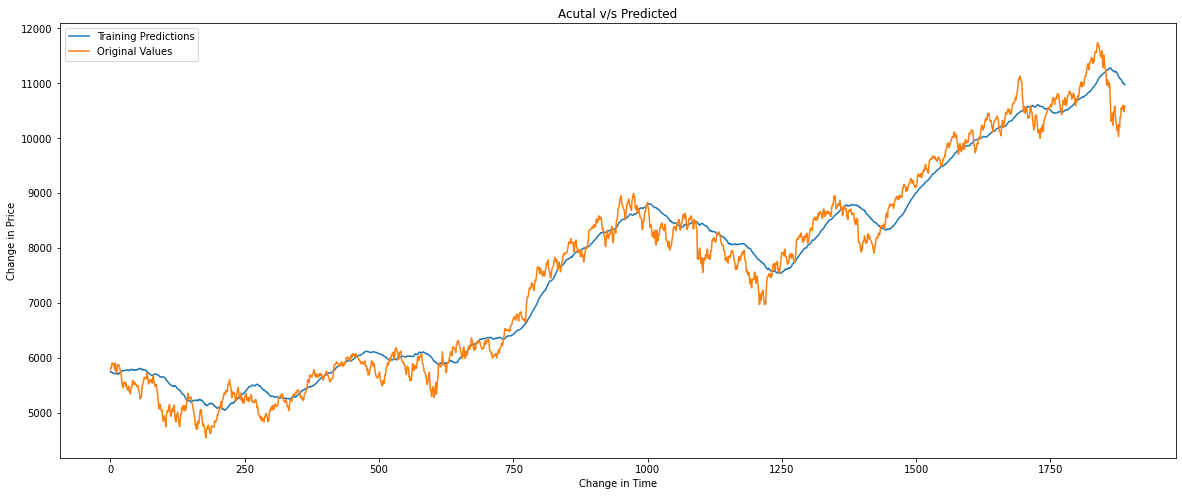

In [41]:
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(training_predictions) , label='Training Predictions')
plt.plot(scaler.inverse_transform(np.array(y_train).reshape(-1,1)), label = 'Original Values')
plt.legend()
plt.title('Acutal v/s Predicted')
plt.xlabel('Change in Time')
plt.ylabel('Change in Price')
plt.show()

In [38]:
preds = regressor.predict(X_test)

In [44]:
print('Mean Squared Error = {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds))))
print('Mean absolute Error = {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) , scaler.inverse_transform(preds))))

Mean Squared Error = 1082782.5249073217
Mean absolute Error = 789.7299307724234


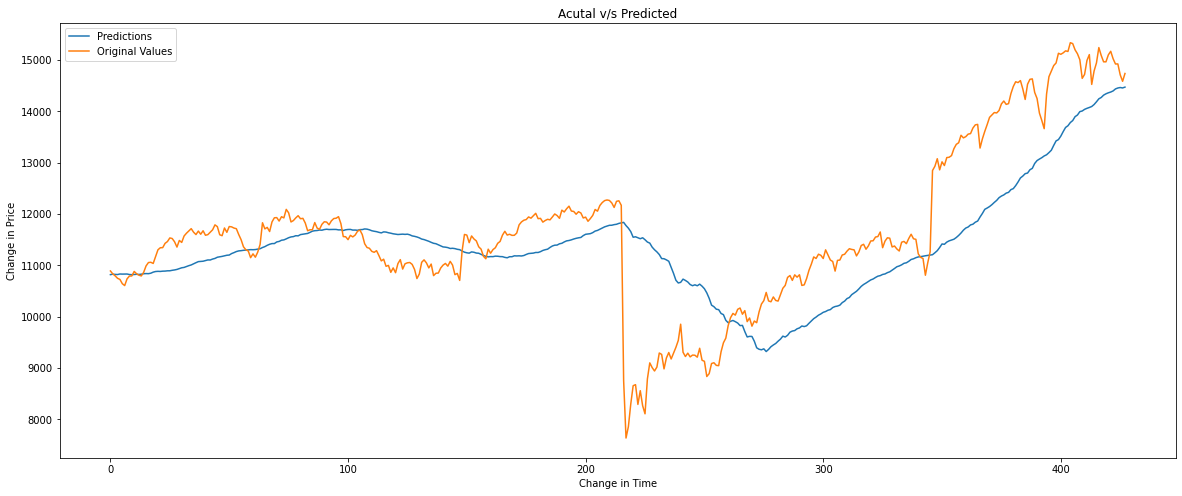

In [45]:
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(preds) , label='Predictions')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)), label = 'Original Values')
plt.legend()
plt.title('Acutal v/s Predicted')
plt.xlabel('Change in Time')
plt.ylabel('Change in Price')
plt.show()

In [23]:
regressor.save('./models/NSE501For10years.pkl')